In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('project_data5.csv')
data

,발생원인,월별,시간대별,사고규모,풍속(m/s),GUST풍속(m/s),현지기압(hPa),습도(%),기온(°C),최대파고(m),...,선 종_기타(통선),선 종_낚시어선,선 종_모터보트,선 종_어선,선 종_여객선,선 종_예부선,선 종_요트,선 종_유도선,선 종_유조선,선 종_화물선
0,운항과실,12,6,2.659574,4.9,7.5,1027.9,51.0,4.8,1.1,...,0,1,0,0,0,0,0,0,0,0
1,취급불량 및 결함,12,21,0.030538,2.7,4.9,1028.6,58.0,8.6,2.2,...,0,0,0,1,0,0,0,0,0,0
2,취급불량 및 결함,12,11,0.333333,6.7,9.6,1030.0,51.0,5.1,2.8,...,0,0,0,1,0,0,0,0,0,0
3,운항과실,12,14,0.186235,8.8,11.8,1028.4,64.0,4.7,2.5,...,0,0,0,0,1,0,0,0,0,0
4,관리문제,12,13,0.238095,8.8,11.5,1029.4,63.0,4.8,3.1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16842,취급불량 및 결함,1,17,2.333333,7.0,9.7,1023.9,56.0,5.0,2.3,...,0,1,0,0,0,0,0,0,0,0
16843,취급불량 및 결함,1,15,0.518135,6.3,8.9,1023.9,55.0,4.4,3.0,...,0,0,0,1,0,0,0,0,0,0
16844,취급불량 및 결함,1,12,2.311248,8.0,10.3,1027.0,62.0,3.0,1.3,...,0,1,0,0,0,0,0,0,0,0
16845,운항과실,1,11,0.500000,6.5,9.6,1027.9,59.0,4.5,1.7,...,0,0,0,1,0,0,0,0,0,0


# 1. SVM

In [3]:
# 필요한 사이킷런 라이브러리 업로드 !! 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [5]:
y = data['발생원인']
X = data.drop(['발생원인'], axis=1)

In [42]:
# train vs test | train vs validation
X_train_all, X_test, y_train_all, y_test = train_test_split(X, y, random_state=42, stratify = y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, stratify = y, test_size=0.2)

Text(0, 0.5, 'Feature magnitude')

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


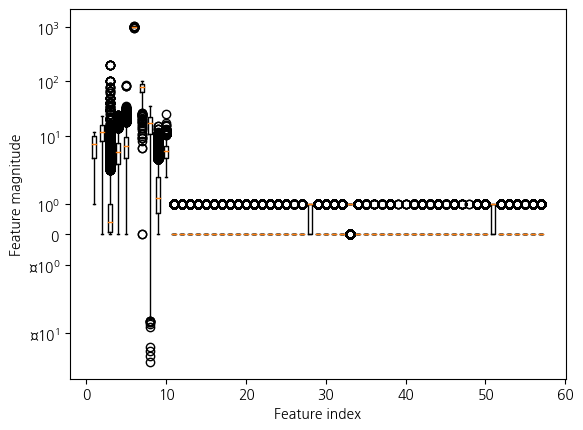

In [43]:
import matplotlib.pyplot as plt
plt.boxplot(X_train_all, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

In [8]:
## scaling 진행
## 여기서는 범주형 변수가 있으므로 자동으로 범위를 [0,1]로 주고자 minmax scaling을 진행하였다.

In [44]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

Text(0, 0.5, 'Feature magnitude')

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


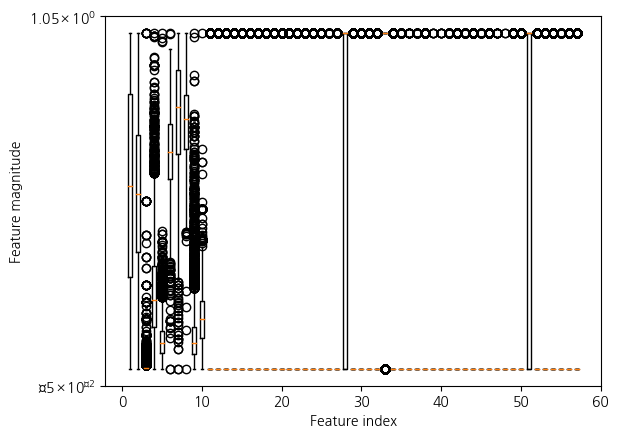

In [45]:
plt.boxplot(X_train_scaled, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

In [46]:
training_accuracy = []
val_accuracy = []

C_settings = [0.01, 1, 100]
gamma_settings = [0.01, 0.1, 1]
for C in C_settings:
    for gamma in gamma_settings:
        svc = SVC(C=C, gamma=gamma, kernel='rbf')
        svc.fit(X_train_scaled, y_train)
        y_train_hat = svc.predict(X_train_scaled)
        y_val_hat = svc.predict(X_val_scaled)
        
        training_accuracy.append(accuracy_score(y_train, y_train_hat))
        val_accuracy.append(accuracy_score(y_val, y_val_hat))

In [47]:
pd.DataFrame({"C":sorted(C_settings*3), "gamma":gamma_settings*3, "training accuracy": training_accuracy, "validation accuracy": val_accuracy})

,C,gamma,training accuracy,validation accuracy
0,0.01,0.01,0.418342,0.418398
1,0.01,0.10,0.418342,0.418398
2,0.01,1.00,0.418342,0.418398
3,1.00,0.01,0.455368,0.445994
4,1.00,0.10,0.492543,0.478932
5,1.00,1.00,0.589003,0.481009
6,100.00,0.01,0.496401,0.484273
7,100.00,0.10,0.597017,0.488427
8,100.00,1.00,0.830081,0.437389


In [48]:
final_svc = SVC(C=100 , gamma=0.01 , kernel='rbf')
final_svc.fit(X_train_scaled, y_train)
y_test_hat = final_svc.predict(X_test_scaled)

In [49]:
accuracy_score(y_test, y_test_hat)

0.48427299703264093

In [50]:
f1_score(y_test, y_test_hat, average='macro')

0.34817489450138794

In [51]:
confusion_matrix(y_test, y_test_hat)

array([[  60,   20,    2,  160,  201],
       [   5,   76,    0,   26,   32],
       [  15,    8,    0,   74,  129],
       [  33,   25,    0,  494,  600],
       [  42,   33,    0,  333, 1002]], dtype=int64)

# 2. RandomForest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
# RandomForest는 scaling에 robust를 함으로 scaling을 적용하지 않은 data를 이용 ! 

In [54]:
training_accuracy = []
val_accuracy = []

n_settings = [5, 10, 20, 50, 100, 200, 400, 600, 800, 1000]
for n in n_settings:
    clf = RandomForestClassifier(n_estimators=n)
    clf.fit(X_train, y_train)
    
    y_train_hat = clf.predict(X_train)
    y_val_hat = clf.predict(X_val)
    
    training_accuracy.append(accuracy_score(y_train, y_train_hat))
    val_accuracy.append(accuracy_score(y_val, y_val_hat))

In [55]:
pd.DataFrame({"n_estimators":n_settings, "training accuracy": training_accuracy, "val accuracy": val_accuracy})

,n_estimators,training accuracy,val accuracy
0,5,0.947169,0.477745
1,10,0.985234,0.505638
2,20,0.997700,0.515134
3,50,0.999852,0.529080
4,100,0.999852,0.543917
5,200,0.999852,0.547181
6,400,0.999852,0.545994
7,600,0.999852,0.543027
8,800,0.999852,0.551335
9,1000,0.999852,0.543323


In [56]:
final_clf = RandomForestClassifier(n_estimators = 800)
final_clf.fit(X_train, y_train)
y_test_hat = final_clf.predict(X_test)

In [57]:
accuracy_score(y_test, y_test_hat)

0.5433234421364985

In [58]:
f1_score(y_test, y_test_hat, average='macro')

0.47791067375636426

In [59]:
confusion_matrix(y_test, y_test_hat)

array([[233,   8,   0,  50, 152],
       [ 15,  67,   3,  19,  35],
       [ 29,   4,  22,  75,  96],
       [ 40,  14,   0, 580, 518],
       [ 56,  14,   1, 410, 929]], dtype=int64)

In [36]:
# feature importance
clf.feature_importances_

array([4.87039273e-02, 7.05374817e-02, 1.40714514e-01, 7.83879544e-02,
       7.88435202e-02, 8.23317675e-02, 7.45176662e-02, 8.08141716e-02,
       7.23541666e-02, 6.68627442e-02, 8.38313276e-03, 5.49749660e-03,
       8.70132868e-03, 6.04136448e-03, 4.76054431e-03, 8.58551802e-03,
       4.49576598e-03, 4.89101702e-03, 2.55242560e-03, 5.96395063e-03,
       6.69168264e-03, 3.87751078e-03, 6.95508564e-03, 2.72225389e-03,
       7.43573827e-03, 8.68017784e-04, 1.13696587e-03, 1.02041503e-02,
       4.99050405e-03, 8.48110065e-03, 8.40561577e-03, 4.55681058e-03,
       1.21267779e-02, 2.77441041e-03, 1.96374851e-03, 2.35527581e-04,
       8.39536195e-04, 3.73967856e-03, 3.18172368e-05, 8.00661672e-05,
       9.96493073e-04, 2.58445188e-03, 9.48871139e-04, 3.87189264e-03,
       9.36695601e-04, 4.18171158e-03, 2.53330625e-04, 7.53201983e-05,
       4.75264351e-03, 1.19805477e-02, 1.01757656e-02, 2.36913365e-03,
       4.27436115e-03, 3.37298308e-03, 1.01869900e-03, 2.67177912e-03,
      

In [39]:
def plot_feature_importances_cancer(model):
    n_features = data.shape[1] - 1 
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns, size = 10)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

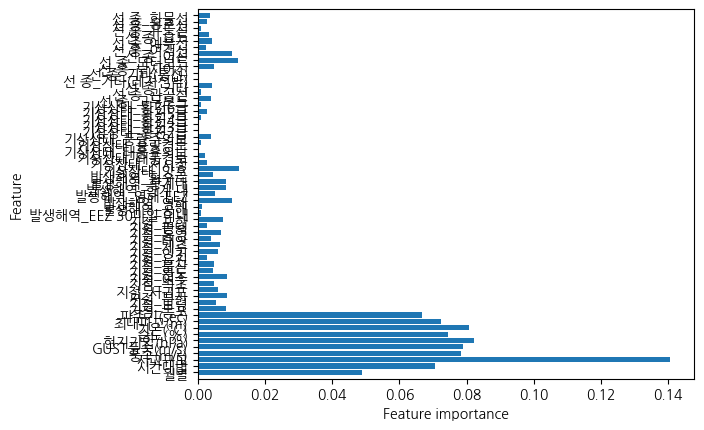

In [40]:
plot_feature_importances_cancer(clf)

In [41]:
data['발생원인'].value_counts()

취급불량 및 결함    7048
운항과실         5759
관리문제         2212
기타           1131
기상문제          697
Name: 발생원인, dtype: int64

## 실험 결과
### 우선적으로 대표적인 classifier alogorithm인 SVM 과 Random Forest를 가지고 실험을 진행해 보았다.

#### SVM
 - scaling에 굉장히 예민한 알고리즘이다 보니 scaling을 적용하였고 이 때, 범주형 변수가 one-hot encoding이 되어 있어서 이와 같은 범위인 [0,1]로 맞춰주고자 MinMax Scaling을 진행하였다.
 - 또한, 대표적인 hyperparameter인 C와 gamma를 변형해가며 hyperparameter tuning도 진행하였다.
 - 그 결과 C=100 , gamma=0.01인 상황이 best라고 판단되어 이 값을 가지고 test를 진행하였다.
 - accuracy : 48.4%, f1_score : 34.8%
 - confustion matrix를 살펴본 결과 '관리문제'로 예측되는 경우가 매우 적었음을 확인할 수 있다.
 
 
 #### RandomForest
 - scaling의 robust한 알거리즘으로 scaling을 적용하지 않은 데이터를 가지고 실험을 진행하였다.
 - n_estimator이라는 hyperparameter를 변경해가며 validation에 대한 socre를 측정하면서 기본적으로 n_estimator가 높을 수록 실험결과가 좋음을 확인하였다.
 - 그 중 n_estimator 800이 bset라고 생각하여 이를 기준으로 최종 test를 진행하였다.
 - accuracy : 54.3%, f1_score : 47.79%
 - confustion matrix를 살펴본 결과 SVM과 달리 '관리문제'도 어느정도 예측할고 있고 이것이 accuracy에 반영된 것으로 보인다.
 - feature importance를 보면 아무래도 기상과 관련된 요인이 사고에 영향을 많이 미치는 것을 알 수 있었고 시각화에서 확인할 수 있었듯이 월별, 시간대별도 그에 준하는 영향을 끼친것으로 확인할 수 있었다.
 
 #### 정형데이터에서는 boosting기반의 알고리즘이 잘 통하는 것으로 알려져 있어 추가적으로 XGBoosting, LightGBM을 적용해보고자 한다.